In [1]:
# import tools (pandas ect)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read in files
storm_df = pd.read_csv("Resources/storms.csv")
#storm_df.tail()

In [3]:
florida_2019_df = pd.read_csv('Resources/Florida_2019_all_counties.csv')
florida_2020_df = pd.read_csv('Resources/Florida_2020_all_counties.csv')
florida_2021_df = pd.read_csv('Resources/Florida_2021_all_counties.csv')

#florida_2019_df

In [4]:
flood_df = pd.read_csv('Resources/nfip-flood-policies.csv')
#flood_df.head()

C:\Users\antoi\AppData\Local\Temp\ipykernel_25732\3959475226.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  flood_df = pd.read_csv('Resources/nfip-flood-policies.csv')


In [5]:
storm_df['status'].unique()

array(['tropical depression', 'tropical storm', 'extratropical',
       'hurricane', 'subtropical storm', 'subtropical depression',
       'disturbance', 'other low', 'tropical wave'], dtype=object)

In [6]:
#Extract only hurricane data from the storm dataframe
hurricane = storm_df.loc[storm_df['status'] == 'hurricane']
hurricane.set_index('year', inplace = True)

In [7]:
#Extract years of interest and save as sepearte dataframe
hurricane_2017_2021 = hurricane.loc[[2017, 2018 , 2019, 2020, 2021]]
hurricane_2017_2021.head()

,Unnamed: 0,name,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
year,,,,,,,,,,,,,
2017,16027,Franklin,8,9,18,20.2,-94.4,hurricane,1.0,65,984,210.0,30.0
2017,16028,Franklin,8,10,0,20.3,-95.5,hurricane,1.0,75,981,220.0,30.0
2017,16029,Franklin,8,10,5,20.0,-96.6,hurricane,1.0,70,990,220.0,30.0
2017,16045,Gert,8,15,6,31.5,-72.3,hurricane,1.0,65,986,140.0,20.0
2017,16046,Gert,8,15,12,32.3,-72.1,hurricane,1.0,70,982,150.0,20.0


In [8]:
#Drop unneeded columns
hurricane_2017_2021.drop(columns=['Unnamed: 0','status'], inplace=True)
hurricane_2017_2021

,name,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
year,,,,,,,,,,,
2017,Franklin,8,9,18,20.2,-94.4,1.0,65,984,210.0,30.0
2017,Franklin,8,10,0,20.3,-95.5,1.0,75,981,220.0,30.0
2017,Franklin,8,10,5,20.0,-96.6,1.0,70,990,220.0,30.0
2017,Gert,8,15,6,31.5,-72.3,1.0,65,986,140.0,20.0
2017,Gert,8,15,12,32.3,-72.1,1.0,70,982,150.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2021,Sam,10,4,0,38.7,-52.2,2.0,90,957,420.0,100.0
2021,Sam,10,4,6,39.9,-49.9,2.0,90,957,440.0,60.0
2021,Sam,10,4,12,41.4,-47.1,2.0,85,960,440.0,60.0


In [9]:
hurricane_2017_2021 = hurricane_2017_2021.reset_index()


In [10]:
hurricane_2017_2021.groupby(by = ['year','month'])[['name']].nunique('name')

name
year month      
2017 8         4
     9         5
     10        2
2018 7         2
     9         3
     10        3
2019 7         1
     8         1
     9         4
     10        2
2020 7         2
     8         3
     9         4
     10        4
     11        2
2021 7         1
     8         3
     9         3
     10        1

In [11]:
hurricane_2017_2021['date'] = pd.to_datetime(hurricane_2017_2021[['year','month','day']])
hurricane_2017_2021

,year,name,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date
0,2017,Franklin,8,9,18,20.2,-94.4,1.0,65,984,210.0,30.0,2017-08-09
1,2017,Franklin,8,10,0,20.3,-95.5,1.0,75,981,220.0,30.0,2017-08-10
2,2017,Franklin,8,10,5,20.0,-96.6,1.0,70,990,220.0,30.0,2017-08-10
3,2017,Gert,8,15,6,31.5,-72.3,1.0,65,986,140.0,20.0,2017-08-15
4,2017,Gert,8,15,12,32.3,-72.1,1.0,70,982,150.0,20.0,2017-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2021,Sam,10,4,0,38.7,-52.2,2.0,90,957,420.0,100.0,2021-10-04
703,2021,Sam,10,4,6,39.9,-49.9,2.0,90,957,440.0,60.0,2021-10-04
704,2021,Sam,10,4,12,41.4,-47.1,2.0,85,960,440.0,60.0,2021-10-04
705,2021,Sam,10,4,18,43.8,-43.6,1.0,80,965,500.0,70.0,2021-10-04


In [12]:
clean_2019 = florida_2019_df.drop(florida_2019_df.tail(4).index)
clean_2019.drop(florida_2019_df.head(3).index, inplace=True)
clean_2020 = florida_2020_df.drop(florida_2020_df.tail(4).index)
clean_2020.drop(florida_2020_df.head(3).index, inplace=True)
clean_2021 = florida_2021_df.drop(florida_2021_df.tail(4).index)
clean_2021.drop(florida_2021_df.head(3).index, inplace=True)
clean_2021

,CAGDP1 County and MSA gross domestic product (GDP) summary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
3,12001,"Alachua, FL",1,Real GDP (thousands of chained 2017 dollars),6.7
4,12001,"Alachua, FL",2,Chain-type quantity indexes for real GDP,6.7
5,12001,"Alachua, FL",3,Current-dollar GDP (thousands of current dollars),10.2
6,12003,"Baker, FL",1,Real GDP (thousands of chained 2017 dollars),4.4
7,12003,"Baker, FL",2,Chain-type quantity indexes for real GDP,4.4
...,...,...,...,...,...
199,12131,"Walton, FL",2,Chain-type quantity indexes for real GDP,16.6
200,12131,"Walton, FL",3,Current-dollar GDP (thousands of current dollars),21.2
201,12133,"Washington, FL",1,Real GDP (thousands of chained 2017 dollars),4.9
202,12133,"Washington, FL",2,Chain-type quantity indexes for real GDP,4.9


In [13]:
gdp_rows_2019 = clean_2019[clean_2019['Unnamed: 3'].str.contains('Real GDP \(thousands of chained 2017 dollars\)')]
gdp_rows_2020 = clean_2020[clean_2020['Unnamed: 3'].str.contains('Real GDP \(thousands of chained 2017 dollars\)')]
gdp_rows_2021 = clean_2021[clean_2021['Unnamed: 3'].str.contains('Real GDP \(thousands of chained 2017 dollars\)')]
gdp_rows_2019.columns = ['Index' , 'County', 'rand','Title','Value']
gdp_rows_2020.columns = ['Index' , 'County', 'rand','Title','Value']
gdp_rows_2021.columns = ['Index' , 'County', 'rand','Title','Value']
gdp_rows_2019.drop(columns=['Title','rand', 'Index'], inplace=True)
gdp_rows_2020.drop(columns=['Title','rand', 'Index'], inplace=True)
gdp_rows_2021.drop(columns=['Title','rand', 'Index'], inplace=True)
display(gdp_rows_2019.head())
display(gdp_rows_2020.head())
display(gdp_rows_2021.head())

C:\Users\antoi\AppData\Local\Temp\ipykernel_25732\2484456687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_rows_2019.drop(columns=['Title','rand', 'Index'], inplace=True)
C:\Users\antoi\AppData\Local\Temp\ipykernel_25732\2484456687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_rows_2020.drop(columns=['Title','rand', 'Index'], inplace=True)
C:\Users\antoi\AppData\Local\Temp\ipykernel_25732\2484456687.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,County,Value
3,"Alachua, FL",2.7
6,"Baker, FL",0.3
9,"Bay, FL",1
12,"Bradford, FL",-6.8
15,"Brevard, FL",4.4


,County,Value
3,"Alachua, FL",-0.5
6,"Baker, FL",8.2
9,"Bay, FL",1.3
12,"Bradford, FL",5.5
15,"Brevard, FL",0.9


,County,Value
3,"Alachua, FL",6.7
6,"Baker, FL",4.4
9,"Bay, FL",8.3
12,"Bradford, FL",-2
15,"Brevard, FL",9.8


In [14]:
# Merge the dataframes on the County column
merged_df = pd.merge(gdp_rows_2019, gdp_rows_2020, on='County', suffixes=('_2019', '_2020'))
merged_df = pd.merge(merged_df, gdp_rows_2021, on='County')
merged_df['County'] = merged_df['County'].str.split(',').str.get(0)
merged_df

,County,Value_2019,Value_2020,Value
0,Alachua,2.7,-0.5,6.7
1,Baker,0.3,8.2,4.4
2,Bay,1,1.3,8.3
3,Bradford,-6.8,5.5,-2
4,Brevard,4.4,0.9,9.8
...,...,...,...,...
62,Union,-0.8,2.7,6.3
63,Volusia,1.6,0.6,4.9
64,Wakulla,5.1,0.8,6
65,Walton,7.6,2,16.6


In [15]:
merged_df.set_index('County', inplace=True)
merged_df

,Value_2019,Value_2020,Value
County,,,
Alachua,2.7,-0.5,6.7
Baker,0.3,8.2,4.4
Bay,1,1.3,8.3
Bradford,-6.8,5.5,-2
Brevard,4.4,0.9,9.8
...,...,...,...
Union,-0.8,2.7,6.3
Volusia,1.6,0.6,4.9
Wakulla,5.1,0.8,6


<Figure size 1000x600 with 0 Axes>

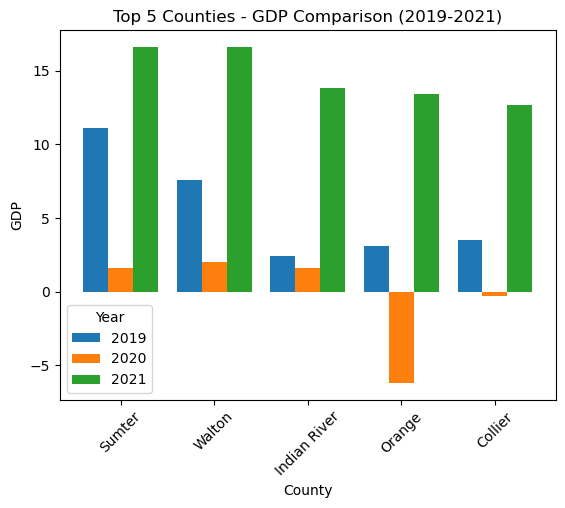

In [16]:
# Convert GDP columns to numeric type
merged_df['Value_2019'] = pd.to_numeric(merged_df['Value_2019'])
merged_df['Value_2020'] = pd.to_numeric(merged_df['Value_2020'])
merged_df['Value'] = pd.to_numeric(merged_df['Value'])


# Sort DataFrame by GDP to get top 5 highest GDP counties
top5_counties = merged_df['Value'].nlargest(5)
top5_counties_data = merged_df.loc[top5_counties.index]

# Plot top 5 highest GDP counties
plt.figure(figsize=(10, 6))
top5_counties_data.plot(kind='bar', width=0.8)
plt.title('Top 5 Counties - GDP Comparison (2019-2021)')
plt.xlabel('County')
plt.ylabel('GDP')
plt.xticks(rotation=45)
legend_labels = ['2019', '2020', '2021']
plt.legend(legend_labels, title='Year')
plt.show()

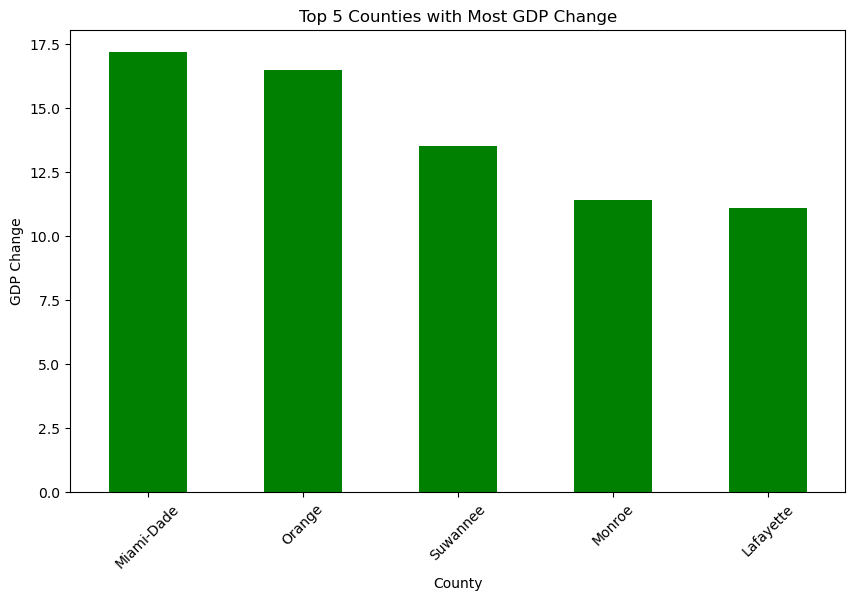

In [17]:
merged_df['GDP_Change'] = merged_df['Value'] - merged_df['Value_2019'] - merged_df['Value_2020']
# Sort DataFrame by GDP change to get top 5 counties with most change
top5_gdp_change_counties = merged_df['GDP_Change'].nlargest(5)

# Plot top 5 counties with most GDP change
plt.figure(figsize=(10, 6))
top5_gdp_change_counties.plot(kind='bar', color='green')
plt.title('Top 5 Counties with Most GDP Change')
plt.xlabel('County')
plt.ylabel('GDP Change')
plt.xticks(rotation=45)
plt.show()